## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model

model = build_mlp()

W0715 22:09:38.939829  5560 deprecation_wrapper.py:119] From D:\Anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0715 22:09:38.950825  5560 deprecation_wrapper.py:119] From D:\Anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0715 22:09:38.952821  5560 deprecation_wrapper.py:119] From D:\Anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
model.summary()
#optimizer = keras.optimizers.Adam(lr=0.001)
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0715 22:09:38.991716  5560 deprecation_wrapper.py:119] From D:\Anaconda3\envs\keras37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0715 22:09:38.995706  5560 deprecation_wrapper.py:119] From D:\Anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0715 22:09:39.050565  5560 deprecation.py:323] From D:\Anaconda3\envs\keras37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0715 22:09:39.080480  5560 deprecation_wrapper.py:119] From D:\Anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 53us/step - loss: 2.2669 - acc: 0.1567 - val_loss: 2.2096 - val_acc: 0.2062
Epoch 2/500
50000/50000 [==============================] - 1s 30us/step - loss: 2.1739 - acc: 0.2351 - val_loss: 2.1365 - val_acc: 0.2570
Epoch 3/500
50000/50000 [==============================] - 1s 30us/step - loss: 2.1089 - acc: 0.2657 - val_loss: 2.0818 - val_acc: 0.2770
Epoch 4/500
50000/50000 [==============================] - 1s 30us/step - loss: 2.0608 - acc: 0.2825 - val_loss: 2.0393 - val_acc: 0.2882
Epoch 5/500
50000/50000 [==============================] - 2s 30us/step - loss: 2.0230 - acc: 0.2957 - val_loss: 2.0072 - val_acc: 0.3029
Epoch 6/500
50000/50000 [==============================] - 1s 30us/step - loss: 1.9930 - acc: 0.3052 - val_loss: 1.9792 - val_acc: 0.3057
Epoch 7/500
50000/50000 [==============================] - 1s 30us/step - loss: 1.9677 - acc: 0.3118 - val_loss: 1.9563 - 

Epoch 118/500
50000/50000 [==============================] - 1s 30us/step - loss: 1.5123 - acc: 0.4732 - val_loss: 1.5427 - val_acc: 0.4543
Epoch 119/500
50000/50000 [==============================] - 1s 30us/step - loss: 1.5105 - acc: 0.4748 - val_loss: 1.5424 - val_acc: 0.4544
Epoch 120/500
50000/50000 [==============================] - 1s 30us/step - loss: 1.5087 - acc: 0.4750 - val_loss: 1.5414 - val_acc: 0.4567
Epoch 121/500
50000/50000 [==============================] - 1s 30us/step - loss: 1.5069 - acc: 0.4760 - val_loss: 1.5406 - val_acc: 0.4561
Epoch 122/500
50000/50000 [==============================] - 1s 30us/step - loss: 1.5048 - acc: 0.4775 - val_loss: 1.5468 - val_acc: 0.4510
Epoch 123/500
50000/50000 [==============================] - 1s 30us/step - loss: 1.5033 - acc: 0.4764 - val_loss: 1.5379 - val_acc: 0.4571
Epoch 124/500
50000/50000 [==============================] - 1s 30us/step - loss: 1.5011 - acc: 0.4779 - val_loss: 1.5376 - val_acc: 0.4562
Epoch 125/500
50000/

50000/50000 [==============================] - 1s 30us/step - loss: 1.3353 - acc: 0.5351 - val_loss: 1.4307 - val_acc: 0.4968
Epoch 235/500
50000/50000 [==============================] - 1s 30us/step - loss: 1.3337 - acc: 0.5349 - val_loss: 1.4333 - val_acc: 0.4898
Epoch 236/500
50000/50000 [==============================] - 1s 30us/step - loss: 1.3322 - acc: 0.5357 - val_loss: 1.4271 - val_acc: 0.4976
Epoch 237/500
50000/50000 [==============================] - 1s 29us/step - loss: 1.3306 - acc: 0.5364 - val_loss: 1.4214 - val_acc: 0.4950
Epoch 238/500
50000/50000 [==============================] - 1s 30us/step - loss: 1.3300 - acc: 0.5363 - val_loss: 1.4565 - val_acc: 0.4869
Epoch 239/500
50000/50000 [==============================] - 1s 30us/step - loss: 1.3281 - acc: 0.5372 - val_loss: 1.4387 - val_acc: 0.4912
Epoch 240/500
50000/50000 [==============================] - 1s 30us/step - loss: 1.3271 - acc: 0.5377 - val_loss: 1.4213 - val_acc: 0.4969
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 1s 30us/step - loss: 1.1985 - acc: 0.5834 - val_loss: 1.3691 - val_acc: 0.5116
Epoch 351/500
50000/50000 [==============================] - 1s 30us/step - loss: 1.1958 - acc: 0.5845 - val_loss: 1.4118 - val_acc: 0.5008
Epoch 352/500
50000/50000 [==============================] - 1s 30us/step - loss: 1.1951 - acc: 0.5856 - val_loss: 1.3678 - val_acc: 0.5125
Epoch 353/500
50000/50000 [==============================] - 1s 30us/step - loss: 1.1942 - acc: 0.5848 - val_loss: 1.3670 - val_acc: 0.5155
Epoch 354/500
50000/50000 [==============================] - 1s 30us/step - loss: 1.1930 - acc: 0.5853 - val_loss: 1.3612 - val_acc: 0.5128
Epoch 355/500
50000/50000 [==============================] - 1s 29us/step - loss: 1.1913 - acc: 0.5860 - val_loss: 1.3868 - val_acc: 0.5067
Epoch 356/500
50000/50000 [==============================] - 1s 30us/step - loss: 1.1895 - acc: 0.5860 - val_loss: 1.3701 - val_acc: 0.5092
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 2s 30us/step - loss: 1.0767 - acc: 0.6270 - val_loss: 1.4091 - val_acc: 0.5103
Epoch 467/500
50000/50000 [==============================] - 2s 31us/step - loss: 1.0765 - acc: 0.6263 - val_loss: 1.3523 - val_acc: 0.5240
Epoch 468/500
50000/50000 [==============================] - 2s 30us/step - loss: 1.0735 - acc: 0.6282 - val_loss: 1.3841 - val_acc: 0.5192
Epoch 469/500
50000/50000 [==============================] - 1s 30us/step - loss: 1.0752 - acc: 0.6274 - val_loss: 1.3432 - val_acc: 0.5228
Epoch 470/500
50000/50000 [==============================] - 1s 30us/step - loss: 1.0739 - acc: 0.6263 - val_loss: 1.3549 - val_acc: 0.5216
Epoch 471/500
50000/50000 [==============================] - 1s 30us/step - loss: 1.0731 - acc: 0.6258 - val_loss: 1.3612 - val_acc: 0.5175
Epoch 472/500
50000/50000 [==============================] - 1s 30us/step - loss: 1.0714 - acc: 0.6264 - val_loss: 1.3635 - val_acc: 0.5221
Epoch 473/500
50000/50000 [=======

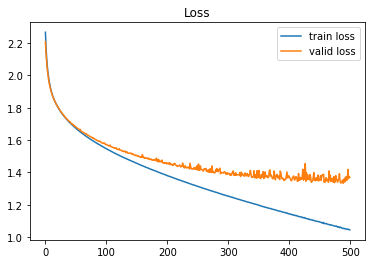

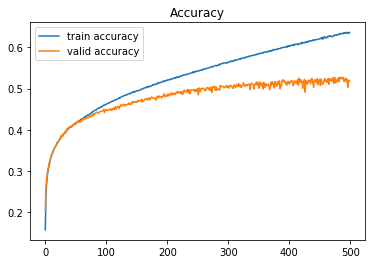

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## 結果討論

Epoch同樣為500的情況下，Adam的overfitting情形較SGD明顯